In [9]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
data, target = load_iris(return_X_y=True, as_frame=True)
target.replace(2, 1, inplace=True)

In [11]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [12]:
target.tail()


145    1
146    1
147    1
148    1
149    1
Name: target, dtype: int32

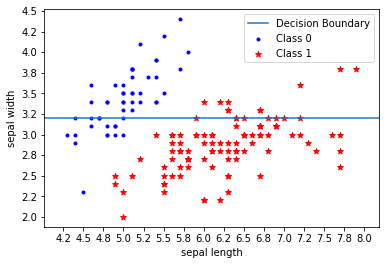

In [13]:
figure, axes = plt.subplots()
axes.set_xticks(np.arange(0, len(data), 0.25), minor=False)
axes.set_xlabel("sepal length")
axes.set_yticks(np.arange(0, len(data), 0.25), minor=False)
axes.set_ylabel("sepal width")

merged = pd.merge(data, target.to_frame(), left_index=True, right_index=True) # Merge data and target values
data_1 = merged.loc[merged["target"] == 0] # Separate samples with target class of 0
 # Get first and second features
data_1_feature_1 = data_1.iloc[:,0]
data_1_feature_2 = data_1.iloc[:,1]
data_2 = merged.loc[merged["target"] == 1] # Separate samples with target class of 1
 # Get first and second features
data_2_feature_1 = data_2.iloc[:,0]
data_2_feature_2 = data_2.iloc[:,1]

axes.scatter(data_1_feature_1, data_1_feature_2, color="blue", marker=".", label="Class 0")
axes.scatter(data_2_feature_1, data_2_feature_2, color="red", marker="*", label="Class 1")

axes.axline((4.2, 3.2), (8.0, 3.2), label="Decision Boundary")

axes.legend()

In [14]:
log_reg = LogisticRegression()
log_reg.fit(data, target)

LogisticRegression()

In [15]:
print(f"""Weights (coefficients): {log_reg.coef_[0]}
Bias-term (intercept or offset): {log_reg.intercept_[0]}""")

Weights (coefficients): [ 0.44501376 -0.89999242  2.32353827  0.97345836]
Bias-term (intercept or offset): -6.690406512010899


In [16]:
# Test the model. Inaccurate because training data is used as testing data, should be separate in ideal scenario.
data_test = data.iloc[75:76,:]
prediction = log_reg.predict(data_test)
print(f"""Actual classification: {target[75]}
Prediction classification: {prediction[0]}""")

data_test = data.iloc[125:126,:]
prediction = log_reg.predict(data_test)
print(f"""Actual classification: {target[125]}
Prediction classification: {prediction[0]}""")

data_test = data.iloc[146:147,:]
prediction = log_reg.predict(data_test)
print(f"""Actual classification: {target[146]}
Prediction classification: {prediction[0]}
""")

score = log_reg.score(data, target)
print(f"Mean prediction accuracy (0-1): {score}")

Actual classification: 1
Prediction classification: 1
Actual classification: 1
Prediction classification: 1
Actual classification: 1
Prediction classification: 1

Mean prediction accuracy (0-1): 1.0
